In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(os.getcwd())
print(os.listdir())

C:\Users\Jason\Documents\SJSU\Astro Research
['.ipynb_checkpoints', 'adv-gal-exercise1.xls', 'Astro Introbook.ipynb', 'DGSATI-HST.ipynb', 'path', 'PCC_cat.txt', 'results.csv', 'Run1737_Camcol6_Field11.jfif', 'Run2662_Camcol4_Field243.jfif', 'Run2738_Camcol2_Field196.jfif', 'Run2738_Camcol3_Field122.jfif', 'Run3325_Camcol1_Field356.jfif', 'Run3325_Camcol1_Field359.jfif', 'Run3325_Camcol2_Field215.jfif', 'Run3325_Camcol2_Field216.jfif', 'Run3325_Camcol3_Field176.jfif', 'Run3325_Camcol3_Field230.jfif', 'Run3325_Camcol3_Field319.jfif', 'Run3325_Camcol3_Field352.jfif', 'Run752_Camcol1_Field244.jfif', 'Run752_Camcol1_Field331.jfif', 'Run752_Camcol1_Field432.jfif', 'run756_Camcol4_Field198.jfif', 'Skyserver_Radial9_28_2022 7_00_56 AM.csv', 'specutils_demo.ipynb', 'Wittmann_etal19.pdf']


In [4]:
# x = requests.get('http://skyserver.sdss.org/dr17/en/tools/getimg/fields.aspx')
csvPath0 = 'adv-gal-exercise1.xls'

testURL = 'https://skyserver.sdss.org/dr17/SkyServerWS/ImgCutout/getJpegCodec?R=94&C=1&F=11&Z=50&TaskName=Skyserver.FrameByRCFZ'

df0 = pd.read_excel(csvPath0, skiprows=3, header = 1)

df0

,Run,Camcol,Field,Characteristics,Group
0,752,1,244,NaN,NaN
1,2662,4,243,NaN,NaN
2,752,1,331,NaN,NaN
3,1737,6,11,NaN,NaN
4,756,4,198,NaN,NaN
5,2738,2,196,NaN,NaN
6,752,1,432,NaN,NaN
7,3325,3,176,NaN,NaN
8,3325,3,319,NaN,NaN
9,3325,2,216,NaN,NaN


In [5]:
def colVar(df, colNum):
    finalCol = []
    for data in df[df.columns[colNum]].to_list():
        if isinstance(data, str):
            finalCol.append(data)
        elif np.math.isnan(data):
            pass
        else:
            finalCol.append(data)
    
    return(np.array(finalCol))

In [6]:
runs = colVar(df0, 0)
camcols = colVar(df0, 1)
fields = colVar(df0, 2)

In [7]:
# urlVar = f'https://skyserver.sdss.org/dr17/SkyServerWS/ImgCutout/getJpegCodec?R={r}&C={c}&F={f}&Z=50&TaskName=Skyserver.FrameByRCFZ'


for r,c,f in zip(runs, camcols, fields):
#     print((r,c,f))
    urlVar = f'https://skyserver.sdss.org/dr17/SkyServerWS/ImgCutout/getJpegCodec?R={r}&C={c}&F={f}&Z=50&TaskName=Skyserver.FrameByRCFZ'
    img_data = requests.get(urlVar).content
    with open(f'Run{r}_Camcol{c}_Field{f}.jfif', 'wb') as handler:
        handler.write(img_data)

In [8]:
# Use the data you collected to make a color-color diagram of Abell 2255 with u-g on the x-axis and g-r on the y-axis
csvPath1 = 'Skyserver_Radial9_28_2022 7_00_56 AM.csv'
df1 = pd.read_csv(csvPath1, skiprows=1)
df1

,objid,run,rerun,camcol,field,obj,type,ra,dec,u,g,r,i,z,Err_u,Err_g,Err_r,Err_i,Err_z
0,1237671939804561475,6162,301,3,133,67,3,258.213357,64.073170,19.22808,17.19313,16.26248,15.74695,15.48740,0.049191,0.004989,0.003695,0.003473,0.007417
1,1237671939804627251,6162,301,3,134,307,6,258.260168,64.070223,19.30001,17.40798,16.68829,16.41637,16.27152,0.027234,0.004707,0.004365,0.004658,0.007695
2,1237671939804561639,6162,301,3,133,231,6,258.251379,64.039396,16.63657,14.89469,14.24193,13.98425,13.87426,0.006984,0.003036,0.003431,0.003744,0.003980
3,1237671939804627072,6162,301,3,134,128,6,258.280793,64.031926,18.49192,17.00065,16.38877,16.15469,15.99900,0.017135,0.004150,0.004080,0.004462,0.006826
4,1237671939804627060,6162,301,3,134,116,6,258.273506,64.038963,17.94130,16.48293,15.96510,15.78293,15.71097,0.012737,0.003673,0.003853,0.004206,0.006094
5,1237671939804561999,6162,301,3,133,591,3,258.230951,64.032409,19.72405,18.28127,17.63827,17.26305,17.14701,0.076321,0.009323,0.007875,0.008122,0.025892
6,1237671939804562030,6162,301,3,133,622,3,258.266223,64.033180,19.90379,18.87459,18.63715,18.39549,18.35460,0.058149,0.010536,0.011511,0.012913,0.044282
7,1237671939804561484,6162,301,3,133,76,3,258.181636,64.053540,19.58479,17.71295,16.78555,16.34320,16.07186,0.050820,0.005918,0.004368,0.004220,0.008886
8,1237671939804561642,6162,301,3,133,234,3,258.240261,64.051032,19.97055,18.02808,17.15332,16.75653,16.50450,0.079111,0.007817,0.005617,0.005609,0.013377
9,1237671939804561640,6162,301,3,133,232,3,258.258458,64.052297,17.96696,15.81899,14.82889,14.39119,14.08146,0.031417,0.003213,0.002435,0.002402,0.004511


In [16]:
u = colVar(df1, 9)
g = colVar(df1, 10)
r = colVar(df1, 11)

ug = u - g
gr = g - r



1.0291999999999994

Text(0.5, 1.0, 'color-color diagram of Abell 2255')

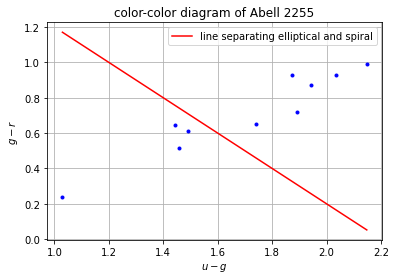

In [18]:
x = np.linspace(ug.min(), ug.max(), 100)
y = -x + 2.2

plt.figure()
plt.plot(ug, gr, 'b.')
plt.plot(x, y, 'r', label = 'line separating elliptical and spiral')
plt.xlabel('$u - g$')
plt.ylabel('$g - r$')
plt.legend()
plt.grid()
plt.title('color-color diagram of Abell 2255')

### Question 6: In the observable universe, 77% of galaxies are spiral (late) and 20% of galaxies are elliptical (early). How does your percentage of early and late galaxies compare to the universe? Would you say the galaxies in the vicinity of Abell 2255 are representative of the universe as a whole?

4 (40 %) galaxies fall below the line and 6 (60 %) are above

In [9]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[1, 3], [4, 5]])

np.matmul(x,y)

array([[ 9, 13],
       [19, 29]])